<h1><center> Análise de dados intolerância religiosa São Paulo</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [115]:
dados = pd.read_csv('bases/dados_sp.csv')

Segundo a metodologia em cada linha constante na tabela registra os dados de uma pessoa, natureza ou objeto relacionado no boletim. Assim, um boletim que possua a identificação de mais de uma pessoa, natureza ou objeto (a depender da pesquisa solicitada) terá os dados da ocorrência multiplicados pelos indexadores solicitados, ou seja, várias linhas podem se referir ao mesmo boletim. Para conclusões quanto as quantidades de ocorrências é necessária exclusão das duplicidades por meio dos campos: NOME_DELEGACIA, ANO_BO, NUM_BO.

In [116]:
dados.head()

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DESCR_SOLUCAO,DESCR_PROVIDENCIA,NOME_DEPARTAMENTO_CIRC,...,DESCRICAO_DEFICIENCIA,DESCR_RELACIONAMENTO,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,NACIONALIDADE_PESSOA,NATURALIDADE_PESSOA
0,10216,DECAP,DEL.SEC.2º SUL,16º D.P. VILA CLEMENTINO,S.PAULO,2019,7354,AG. REPRESENTAÇÃO/REQUERIMENTO,NaN,DECAP,...,NaN,NaN,NaN,F,NaN,Branca,NaN,NaN,NaN,NaN
1,10236,DECAP,DEL.SEC.2º SUL,36º D.P. VILA MARIANA,S.PAULO,2020,312,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,DECAP,...,NaN,NaN,NaN,M,45.0,Branca,AUTONOMO(A),NaN,BRASILEIRA,NAO INFORMADA(MOT=ACERVO)
2,10247,DECAP,DEL.SEC.6º SANTO AMARO,47º D.P. CAPAO REDONDO,S.PAULO,2019,8122,AG. REPRESENTAÇÃO/REQUERIMENTO,NaN,DECAP,...,NaN,NaN,NaN,M,42.0,Parda,NaN,NaN,NaN,BRASILEIRO
3,10248,DECAP,DEL.SEC.6º SANTO AMARO,48º D.P. CIDADE DUTRA,S.PAULO,2020,2553,AG. REPRESENTAÇÃO/REQUERIMENTO,NaN,DECAP,...,NaN,NaN,NaN,F,51.0,Branca,AUTONOMO(A),NaN,NaN,BEZERROS PE
4,10248,DECAP,DEL.SEC.6º SANTO AMARO,48º D.P. CIDADE DUTRA,S.PAULO,2020,2553,AG. REPRESENTAÇÃO/REQUERIMENTO,NaN,DECAP,...,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41788 entries, 0 to 41787
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_DELEGACIA            41788 non-null  int64  
 1   NOME_DEPARTAMENTO       41788 non-null  object 
 2   NOME_SECCIONAL          41788 non-null  object 
 3   NOME_DELEGACIA          41788 non-null  object 
 4   CIDADE                  41788 non-null  object 
 5   ANO_BO                  41788 non-null  int64  
 6   NUM_BO                  41788 non-null  int64  
 7   DESCR_SOLUCAO           41788 non-null  object 
 8   DESCR_PROVIDENCIA       62 non-null     object 
 9   NOME_DEPARTAMENTO_CIRC  41788 non-null  object 
 10  NOME_SECCIONAL_CIRC     41788 non-null  object 
 11  NOME_DELEGACIA_CIRC     41788 non-null  object 
 12  NOME_MUNICIPIO_CIRC     41788 non-null  object 
 13  DESCR_TIPO_BO           41788 non-null  object 
 14  DATA_OCORRENCIA_BO      41788 non-null

Então nos dados há 41788 linhas

In [118]:
dados.drop_duplicates(subset ='NUM_BO',
                     keep = False, inplace = True)

In [119]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11580 entries, 19 to 41787
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_DELEGACIA            11580 non-null  int64  
 1   NOME_DEPARTAMENTO       11580 non-null  object 
 2   NOME_SECCIONAL          11580 non-null  object 
 3   NOME_DELEGACIA          11580 non-null  object 
 4   CIDADE                  11580 non-null  object 
 5   ANO_BO                  11580 non-null  int64  
 6   NUM_BO                  11580 non-null  int64  
 7   DESCR_SOLUCAO           11580 non-null  object 
 8   DESCR_PROVIDENCIA       0 non-null      object 
 9   NOME_DEPARTAMENTO_CIRC  11580 non-null  object 
 10  NOME_SECCIONAL_CIRC     11580 non-null  object 
 11  NOME_DELEGACIA_CIRC     11580 non-null  object 
 12  NOME_MUNICIPIO_CIRC     11580 non-null  object 
 13  DESCR_TIPO_BO           11580 non-null  object 
 14  DATA_OCORRENCIA_BO      11580 non-nul

    Retirando os registros duplicados temos um total de 11580 denúncias entre 2019 e 2021. Com aproximdamente 91% dos           registros de BO feitos em 2021, confofrme tabela abaixo.

In [121]:
dados['ANO_BO'].value_counts()*100/11580

2021    90.906736
2020     9.050086
2019     0.043178
Name: ANO_BO, dtype: float64

In [114]:
# Essa variavel indica se houve intolerância ou não. Assim foram excluídos para a análise os que receberam N e X
dados['FLAG_INTOLERANCIA'].value_counts()

S    11483
N       83
X       14
Name: FLAG_INTOLERANCIA, dtype: int64

In [122]:
dados_ = pd.DataFrame(dados.loc[dados['FLAG_INTOLERANCIA'] == 'S'])

In [123]:
dados_['TIPO_INTOLERANCIA'].value_counts()

Religioso    11483
Name: TIPO_INTOLERANCIA, dtype: int64

In [124]:
dados_['FLAG_STATUS'].value_counts()

CONSUMADO    11419
TENTADO         64
Name: FLAG_STATUS, dtype: int64

In [125]:
dados_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11483 entries, 19 to 41787
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_DELEGACIA            11483 non-null  int64  
 1   NOME_DEPARTAMENTO       11483 non-null  object 
 2   NOME_SECCIONAL          11483 non-null  object 
 3   NOME_DELEGACIA          11483 non-null  object 
 4   CIDADE                  11483 non-null  object 
 5   ANO_BO                  11483 non-null  int64  
 6   NUM_BO                  11483 non-null  int64  
 7   DESCR_SOLUCAO           11483 non-null  object 
 8   DESCR_PROVIDENCIA       0 non-null      object 
 9   NOME_DEPARTAMENTO_CIRC  11483 non-null  object 
 10  NOME_SECCIONAL_CIRC     11483 non-null  object 
 11  NOME_DELEGACIA_CIRC     11483 non-null  object 
 12  NOME_MUNICIPIO_CIRC     11483 non-null  object 
 13  DESCR_TIPO_BO           11483 non-null  object 
 14  DATA_OCORRENCIA_BO      11483 non-nul

In [126]:
dados_['ANO_BO'].value_counts()*100/11483

2021    91.099887
2020     8.856571
2019     0.043543
Name: ANO_BO, dtype: float64

Então houve 11483 registros unicos de boletim de ocorrência com intolerância religiosa

Fazendo recorte para o ano de 2020, focando as análises para o segundo semestre.

In [128]:
dados_2020 = pd.DataFrame(dados_.loc[dados_['ANO_BO'] == 2020])

In [129]:
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 228 to 39475
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_DELEGACIA            1017 non-null   int64  
 1   NOME_DEPARTAMENTO       1017 non-null   object 
 2   NOME_SECCIONAL          1017 non-null   object 
 3   NOME_DELEGACIA          1017 non-null   object 
 4   CIDADE                  1017 non-null   object 
 5   ANO_BO                  1017 non-null   int64  
 6   NUM_BO                  1017 non-null   int64  
 7   DESCR_SOLUCAO           1017 non-null   object 
 8   DESCR_PROVIDENCIA       0 non-null      object 
 9   NOME_DEPARTAMENTO_CIRC  1017 non-null   object 
 10  NOME_SECCIONAL_CIRC     1017 non-null   object 
 11  NOME_DELEGACIA_CIRC     1017 non-null   object 
 12  NOME_MUNICIPIO_CIRC     1017 non-null   object 
 13  DESCR_TIPO_BO           1017 non-null   object 
 14  DATA_OCORRENCIA_BO      1017 non-null

In [131]:
# Transformando o tipo da variavel em data
dados_2020['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados_2020['DATA_OCORRENCIA_BO'])

In [132]:
# Transformando o tipo da variavel em data
dados_2020['DATA_COMUNICACAO_BO'] = pd.to_datetime(dados_2020['DATA_COMUNICACAO_BO'])

Como descrito na metodologia a ocorrência e o boletim podem ter datas diferentes pq fica facultado por parte do denunciante o momento do registro. Assim ocorrência realizada de 2002 a 2020, com a maioria sendo em 2020

In [133]:
dados_2020['DATA_OCORRENCIA_BO'].dt.year.value_counts()

2020    993
2019     15
2012      2
2018      2
2010      2
2002      1
2017      1
2014      1
Name: DATA_OCORRENCIA_BO, dtype: int64

In [135]:
dados_2020['DATAHORA_REGISTRO_BO'].value_counts()

7/4/20 23:10      2
6/12/20 22:25     2
12/2/20 14:38     2
7/6/20 14:32      2
12/14/20 16:43    2
                 ..
11/16/20 18:53    1
11/17/20 10:02    1
11/17/20 13:35    1
11/17/20 18:33    1
12/31/20 20:49    1
Name: DATAHORA_REGISTRO_BO, Length: 1007, dtype: int64

In [136]:
dados_2020['DATAHORA_REGISTRO_BO'].dtype

dtype('O')

In [138]:
# criando nova variável data a partir  da variavel datahora do registro do boletim
dados_2020['DATA_REGISTRO_BO'] = pd.to_datetime(dados_2020['DATAHORA_REGISTRO_BO']).dt.date

In [139]:
# Mudadndo o tipo da variavel para data
dados_2020['DATA_REGISTRO_BO'] = pd.to_datetime(dados_2020['DATA_REGISTRO_BO'])

In [140]:
# Quantidade de registros por mês
dados_2020['DATA_REGISTRO_BO'].dt.month.value_counts()

6     276
12    259
7     235
11    223
10     11
5       6
8       5
3       1
4       1
Name: DATA_REGISTRO_BO, dtype: int64

Em 2020 obteve-se 1017 ocorrências com junho sendo o mês com maior concentração de registros,276, seguido de dezembro(259) e julho(235). O segundo semestre concentra apenas 72%  das denúncias.

In [141]:
dados_2020['DESDOBRAMENTO'].value_counts()

Series([], Name: DESDOBRAMENTO, dtype: int64)

In [150]:
dados_2020['RUBRICA'].value_counts()*100/1017 

Outros não criminal                                                                 26.647001
Injúria (art. 140)                                                                  23.598820
Difamação (art. 139)                                                                14.454277
Indeferido                                                                          13.470993
Ameaça (art. 147)                                                                    9.341200
Calúnia (art. 138)                                                                   5.998033
Invasão de dispositivo informático                                                   1.376598
Estelionato (art. 171)                                                               0.983284
Perturbação da tranqüilidade (art. 65)                                               0.491642
Perturbação do trabalho ou do sossego alheios (art. 42)                              0.491642
Dano (art. 163)                                             

In [151]:
dados_2020['DESCR_CONDUTA'].value_counts()

Religião                    2
Cor                         1
INTERIOR ESTABELECIMENTO    1
Name: DESCR_CONDUTA, dtype: int64

26% das natureza juridica das ocorrências são denominadas como Outros não criminal, seguido de 24% injuria e 14% difamação.

Em 2020 não há dados de desdobramentos juridicos envolvidos na ocorrencia. e Apenas 4 boletins tem circunstancia que qualifica a ocorrencia, dentre elas apenas 2 qualifica religião.

In [160]:
dados_2020['BAIRRO'].value_counts()

CENTRO            63
AREA RURAL        15
RURAL             11
SACOMA            10
CAPAO REDONDO      8
                  ..
VILA AMORIM        1
JD BOTANICO I      1
ITAGUASSU          1
ELVIO LUPO         1
JARDIM DO VALE     1
Name: BAIRRO, Length: 614, dtype: int64

In [161]:
dados_2020['CIDADE'].value_counts()*100/1017

S.PAULO                                     33.923304
SOROCABA                                     3.244838
S.JOSE DOS CAMPOS                            3.244838
GUARULHOS                                    3.244838
CAMPINAS                                     2.851524
                                              ...    
ITAQUAQUECETUBA                              0.098328
S.SEBASTIAO                                  0.098328
HORTOLANDIA                                  0.098328
ORINDIUVA                                    0.098328
DUMONT                                       0.098328
Name: CIDADE, Length: 164, dtype: float64

In [162]:
#Descreve grupo de tipos de locais onde se deu o fato
dados_2020['DESCR_TIPOLOCAL'].value_counts()*100/1017

Via pública                   66.175025
Residência                    16.715831
Internet                       8.259587
Comércio e serviços            2.753196
Condominio Residencial         1.868240
Saúde                          1.278269
Terminal/Estação               0.688299
Escritório                     0.393314
Centro Comerc./Empresarial     0.294985
Estabelecimento de ensino      0.294985
Templo e afins                 0.196657
Unidade rural                  0.196657
Repartição Pública             0.196657
Rodovia/Estrada                0.098328
Serviços e bens públicos       0.098328
Estabelecimento industrial     0.098328
Entidade assistencial          0.098328
Estabelecimento bancário       0.098328
Lazer e recreação              0.098328
Shopping Center                0.098328
Name: DESCR_TIPOLOCAL, dtype: float64

In [157]:
dados_2020['DESCR_TIPOLOCAL'] = dados_2020['DESCR_TIPOLOCAL'].str.replace('Via Pública', 'Via pública', regex=True)

In [156]:
#Descreve subgrupo de tipos de locais, vinculado ao tipo de local,  onde se deu o fato
dados_2020['DESCR_SUBTIPOLOCAL'].value_counts()

Outros                                         721
Casa                                           132
Via pública                                     52
Pela Internet                                   27
Whatsapp                                        18
Apartamentos                                    10
Facebook                                         9
Apartamento                                      6
Hospital-Outros                                  5
Instagram                                        4
Pet-Shop                                         3
Aplicativos de Mensagens                         3
Mercado                                          2
Area comum-                                      2
Posto de Saúde                                   2
Via pública-Defrente a residência da vítima      2
Rodoviário-Outros                                1
Chácara-Casa                                     1
Via pública-Transeunte                           1
Interior de veículo particular 

As ocorrências acontecem mais no centro que em outros bairros e a cidade de São Paulo concentra 34% das denúncias.

66% dos crimes acontecem em via pública, seguido da residência da vítma, 17%,  e 8% na internet.

 - Criando dataframe segundo semestre 2020

In [183]:
# Ordenando os dados pela data de registro do boletim
dados_2020 = dados_2020.sort_values(by=['DATA_REGISTRO_BO'])

In [204]:
# Criando dataframe para o segundo semestre
dados_2020_2 = pd.DataFrame(dados_2020.iloc[284:])

In [207]:
#mostrando os meses
dados_2020_2['DATA_REGISTRO_BO'].dt.month.value_counts()

12    259
7     235
11    223
10     11
8       5
Name: DATA_REGISTRO_BO, dtype: int64

In [210]:
dados_2020_2['RUBRICA'].value_counts()*100/733

Outros não criminal                                                                 27.694407
Injúria (art. 140)                                                                  23.328786
Difamação (art. 139)                                                                14.597544
Indeferido                                                                          14.051842
Ameaça (art. 147)                                                                    8.458390
Calúnia (art. 138)                                                                   5.320600
Estelionato (art. 171)                                                               1.227831
Invasão de dispositivo informático                                                   1.091405
Perturbação da tranqüilidade (art. 65)                                               0.682128
Perturbação do trabalho ou do sossego alheios (art. 42)                              0.545703
Praticar a discriminação (Art. 20)                          

In [211]:
dados_2020_2['DESCR_CONDUTA'].value_counts()

Religião                    2
Cor                         1
INTERIOR ESTABELECIMENTO    1
Name: DESCR_CONDUTA, dtype: int64

No segundo semestre os dados de natureza juridica das ocorrências se dão da mesma forma que em todo 2020 a maioria são denominadas como Outros não criminal, seguido de 23% injuria e 14% difamação.

Em 2020/2 não há dados de desdobramentos juridicos envolvidos na ocorrencia. E todos os 4 boletins que possui circunstancia que qualifica a ocorrencia são referentes a esse semestre.

In [212]:
dados_2020_2['BAIRRO'].value_counts()

CENTRO            43
RURAL              9
AREA RURAL         9
BELA VISTA         7
FREGUESIA DO O     6
                  ..
JD GABRIELA        1
CENTO E VINTE      1
TAMBORE            1
BARCELONA          1
CONSOLACAO         1
Name: BAIRRO, Length: 478, dtype: int64

In [213]:
dados_2020_2['CIDADE'].value_counts()*100/733

S.PAULO                                     33.560709
S.JOSE DOS CAMPOS                            3.956344
GUARULHOS                                    3.410641
SOROCABA                                     3.274216
CAMPINAS                                     2.728513
                                              ...    
PIRASSUNUNGA                                 0.136426
CATANDUVA                                    0.136426
ITAQUAQUECETUBA                              0.136426
CESARIO LANGE                                0.136426
BOTUCATU                                     0.136426
Name: CIDADE, Length: 138, dtype: float64

In [214]:
#Descreve grupo de tipos de locais onde se deu o fato
dados_2020_2['DESCR_TIPOLOCAL'].value_counts()*100/733

Via pública                   67.530696
Residência                    16.371078
Internet                       7.230559
Comércio e serviços            3.137790
Condominio Residencial         1.909959
Saúde                          1.227831
Terminal/Estação               0.545703
Escritório                     0.409277
Rodovia/Estrada                0.136426
Shopping Center                0.136426
Unidade rural                  0.136426
Estabelecimento bancário       0.136426
Centro Comerc./Empresarial     0.136426
Templo e afins                 0.136426
Estabelecimento de ensino      0.136426
Repartição Pública             0.136426
Lazer e recreação              0.136426
Serviços e bens públicos       0.136426
Entidade assistencial          0.136426
Estabelecimento industrial     0.136426
Name: DESCR_TIPOLOCAL, dtype: float64

In [215]:
#Descreve subgrupo de tipos de locais, vinculado ao tipo de local,  onde se deu o fato
dados_2020_2['DESCR_SUBTIPOLOCAL'].value_counts()

Outros                                         538
Casa                                            90
Via pública                                     29
Pela Internet                                   15
Whatsapp                                        14
Apartamentos                                     6
Facebook                                         6
Apartamento                                      4
Instagram                                        3
Mercado                                          2
Hospital-Outros                                  2
Pet-Shop                                         2
Area comum-                                      2
Posto de Saúde                                   2
Consultório-Médico                               1
Site de Relacionamento                           1
Chácara-Casa                                     1
Agência-Outros                                   1
Via pública-Transeunte                           1
Interior de veículo particular 

As localidades das ocorrências para o segundo semestre segue o padrão de todo o 2020

 #### Vítimas e Autor
 
 Aqui foram considerados todas as linhas já que estamos olhando para o universo das vítimas e agressor. Foram excluido dados da variavel Flag_intolerancia quando N e X, alaém de dados fora da janela temporal analisada.

In [217]:
dados2 = pd.read_csv('bases/dados_sp.csv')

In [219]:
dados2_ = pd.DataFrame(dados2.loc[dados2['FLAG_INTOLERANCIA'] == 'S'])

In [220]:
dados2_['ANO_BO'].value_counts()

2021    18912
2020    14636
2019     8062
2018       10
Name: ANO_BO, dtype: int64

In [221]:
dados2_ = pd.DataFrame(dados2_.loc[dados2_['ANO_BO'] != 2018])

In [222]:
dados2_['ANO_BO'].value_counts()

2021    18912
2020    14636
2019     8062
Name: ANO_BO, dtype: int64

Analisando os dados apenas para o ano de 2020

In [223]:
dados2_2020 = pd.DataFrame(dados2_.loc[dados2_['ANO_BO'] == 2020])

In [231]:
dados2_2020['DESCR_TIPO_PESSOA'].value_counts()

Vítima                  7951
Autor                   6680
Autor/Vitima               5
Name: DESCR_TIPO_PESSOA, dtype: int64

In [233]:
dados2_2020['DESCR_TIPO_PESSOA'].unique().tolist()

['Autor               ', 'Vítima              ', 'Autor/Vitima        ']

In [235]:
for (row, col) in dados2_2020.iterrows():
    if col.DESCR_TIPO_PESSOA == 'Vítima              ':
        dados2_2020['DESCR_TIPO_PESSOA'].replace(to_replace=col.DESCR_TIPO_PESSOA, value='Vítima', inplace=True)
    if col.DESCR_TIPO_PESSOA == 'Autor               ':
        dados2_2020['DESCR_TIPO_PESSOA'].replace(to_replace=col.DESCR_TIPO_PESSOA, value='Autor', inplace=True)
    if col.DESCR_TIPO_PESSOA == 'Autor/Vitima        ':
        dados2_2020['DESCR_TIPO_PESSOA'].replace(to_replace=col.DESCR_TIPO_PESSOA, value='Autor/Vitima', inplace=True)

Foram registrados 7951 vítimas e 6680 autores, com 5 enquadramentos como Autor/Vitima em 2020 para as 1017 denúncias realizadas.

- Vitimas

In [236]:
dados_vit_2020 = pd.DataFrame(dados2_2020.loc[dados2_2020['DESCR_TIPO_PESSOA'] == 'Vítima'])

In [239]:
dados_vit_2020['SEXO_PESSOA'].value_counts()*100/7951

F    64.432147
M    35.379198
I     0.188656
Name: SEXO_PESSOA, dtype: float64

<AxesSubplot:>

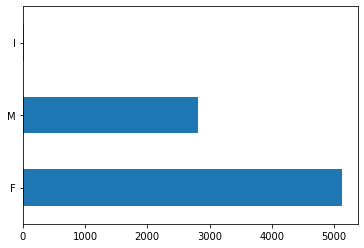

In [238]:
dados_vit_2020['SEXO_PESSOA'].value_counts().plot(kind='barh')

In [240]:
dados_vit_2020['COR_CUTIS'].value_counts()

Branca                  49
Parda                    9
Preta                    7
Outros                   2
Name: COR_CUTIS, dtype: int64

In [241]:
dados_vit_2020['COR_CUTIS'].isnull().value_counts()

True     7884
False      67
Name: COR_CUTIS, dtype: int64

<AxesSubplot:>

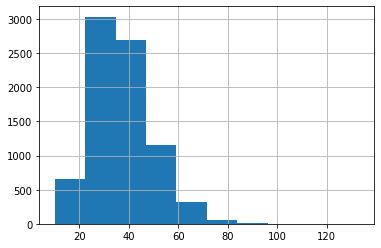

In [244]:
dados_vit_2020['IDADE_PESSOA'].hist()

In [250]:
dados_vit_2020['IDADE_PESSOA'].describe()

count    7933.000000
mean       37.121644
std        11.872875
min        10.000000
25%        28.000000
50%        36.000000
75%        44.000000
max       133.000000
Name: IDADE_PESSOA, dtype: float64

In [251]:
dados_vit_2020.filter(items=['IDADE_PESSOA']).groupby(dados_vit_2020['SEXO_PESSOA']).describe()

IDADE_PESSOA                                                     
                   count       mean        std   min   25%   50%   75%    max
SEXO_PESSOA                                                                  
F                 5122.0  36.409215  11.617482  17.0  27.0  35.0  43.0   89.0
I                    1.0  10.000000        NaN  10.0  10.0  10.0  10.0   10.0
M                 2810.0  38.429893  12.210779  18.0  30.0  37.0  45.0  133.0

In [245]:
dados_vit_2020['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo                             14
Superior completo                           14
1 Grau incompleto                            8
Superior incompleto                          5
1 Grau completo                              2
2 Grau incompleto                            1
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [246]:
dados_vit_2020['DESCR_GRAU_INSTRUCAO'].isnull().value_counts()

True     7907
False      44
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [247]:
dados_vit_2020['DESCR_PROFISSAO'].value_counts()

AUTONOMO(A)                       587
DO LAR                            534
PROFESSOR(A)                      284
DESEMPREGADO(A)                   247
VENDEDOR(A)                       226
                                 ... 
TECNICO(A) TELEFONIA                1
BARMAN                              1
ATENDENTE PORTARIA HOTEL            1
BORRACHEIRO(A)                      1
ROTEIRISTA                          1
Name: DESCR_PROFISSAO, Length: 451, dtype: int64

In [248]:
dados_vit_2020['DESCR_PROFISSAO'].isnull().value_counts()

False    7925
True       26
Name: DESCR_PROFISSAO, dtype: int64

In [252]:
dados_vit_2020.filter(items=['DESCR_PROFISSAO']).groupby(dados_vit_2020['SEXO_PESSOA']).describe()

DESCR_PROFISSAO                                            
                      count unique                             top freq
SEXO_PESSOA                                                            
F                      5115    316  DO LAR                          531
I                         0      0                             NaN  NaN
M                      2810    366  AUTONOMO(A)                     227

In [249]:
dados_vit_2020['NATURALIDADE_PESSOA'].value_counts()

SÃO PAULO                   1211
SAO PAULO                    328
SP                           288
SÃO PAULO - SP               269
BRASILEIRA                   132
                            ... 
MAIRINQUE                      1
SAO BERNARDO DO CAMPO SP       1
MARINGÁ PR                     1
PAULÍNIA/SP                    1
EUNÁPOLIS- BA                  1
Name: NATURALIDADE_PESSOA, Length: 2215, dtype: int64

64% das vítimas são mulheres com média de 36 anos, sendo sua maioria mulheres do lar e naturalizadas de São Paulo.

 - Autor

In [253]:
dados_aut_2020 = pd.DataFrame(dados2_2020.loc[dados2_2020['DESCR_TIPO_PESSOA'] == 'Autor'])

In [254]:
dados_aut_2020['SEXO_PESSOA'].value_counts()*100/6680

I    97.529940
M     1.497006
F     0.973054
Name: SEXO_PESSOA, dtype: float64

<AxesSubplot:>

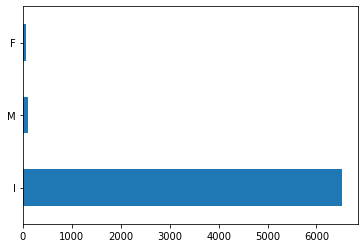

In [255]:
dados_aut_2020['SEXO_PESSOA'].value_counts().plot(kind='barh')

In [256]:
dados_aut_2020['COR_CUTIS'].value_counts()

Branca                  40
Preta                    8
Parda                    6
Não informada            3
Outros                   3
Name: COR_CUTIS, dtype: int64

In [257]:
dados_aut_2020['COR_CUTIS'].isnull().value_counts()

True     6620
False      60
Name: COR_CUTIS, dtype: int64

<AxesSubplot:>

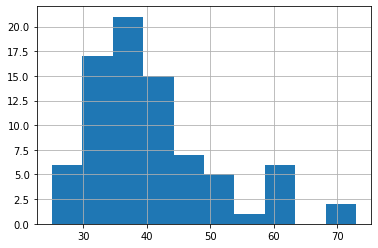

In [258]:
dados_aut_2020['IDADE_PESSOA'].hist()

In [259]:
dados_aut_2020['IDADE_PESSOA'].describe()

count    80.000000
mean     40.900000
std      10.491226
min      25.000000
25%      34.000000
50%      38.000000
75%      45.000000
max      73.000000
Name: IDADE_PESSOA, dtype: float64

In [261]:
dados_aut_2020['IDADE_PESSOA'].isnull().value_counts()

True     6600
False      80
Name: IDADE_PESSOA, dtype: int64

In [260]:
dados_aut_2020.filter(items=['IDADE_PESSOA']).groupby(dados_aut_2020['SEXO_PESSOA']).describe()

IDADE_PESSOA                                                    
                   count       mean        std   min   25%   50%   75%   max
SEXO_PESSOA                                                                 
F                   23.0  39.739130  10.480360  25.0  34.0  36.0  44.0  63.0
I                    0.0        NaN        NaN   NaN   NaN   NaN   NaN   NaN
M                   57.0  41.368421  10.551966  26.0  34.0  40.0  45.0  73.0

In [262]:
dados_aut_2020['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo                             3
Superior completo                           2
1 Grau completo                             2
1 Grau incompleto                           1
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [263]:
dados_aut_2020['DESCR_GRAU_INSTRUCAO'].isnull().value_counts()

True     6672
False       8
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [264]:
dados_aut_2020['DESCR_PROFISSAO'].value_counts()

AUXILIAR DE LIMPEZA               6
VIGILANTE                         5
ENGENHEIRO ELETRICISTA            5
DESEMPREGADO(A)                   5
DESEMPREGADO                      4
AJUDANTE                          4
COMERCIANTE                       3
TECNICO(A) EM INFORMATICA         3
SERVIDOR PUBLICO ESTADUAL         3
AGENTE ADMINISTRATIVO             3
MOTORISTA                         3
MECANICO DE AUTOMOVEL             2
VENDEDOR(A)                       2
AUXILIAR DE ALMOXARIFADO          2
SUPERVISOR(A)                     2
REPRESENTANTE COMERCIAL           2
AUTONOMO(A)                       2
DENTISTA                          2
FAXINEIRO(A)                      2
ENCARREGADO                       2
CABELEIREIRO(A)                   1
MICRO-EMPRESARIO                  1
MOTORISTA DE ONIBUS URBANO        1
PSICOLOGO(A)                      1
PRENDAS DOMESTICAS                1
NAO INFORMADA                     1
ADVOGADO(A)                       1
APOSENTADO(A)               

In [265]:
dados_aut_2020['DESCR_PROFISSAO'].isnull().value_counts()

True     6610
False      70
Name: DESCR_PROFISSAO, dtype: int64

In [266]:
dados_aut_2020.filter(items=['DESCR_PROFISSAO']).groupby(dados_aut_2020['SEXO_PESSOA']).describe()

DESCR_PROFISSAO                                            
                      count unique                             top freq
SEXO_PESSOA                                                            
F                        23     12  AUXILIAR DE LIMPEZA               6
I                         0      0                             NaN  NaN
M                        47     19  ENGENHEIRO ELETRICISTA            5

In [267]:
dados_aut_2020['NATURALIDADE_PESSOA'].value_counts()

SÃO PAULO                    13
S.PAULO -SP                   8
SÃO PAULO  - SP               5
CAMPINAS                      5
DIADEMA -SP                   4
OSASCO                        4
ABATIA                        3
RJ                            3
CACAPAVA SP                   2
JANDIRA                       2
ALAGOAS                       2
BRASILEIRA                    2
OSASCO SP                     2
CAJAZEIRAS PB                 2
SÃO PAULO - SP                2
S.BERNARDO DO CAMPO -SP       2
EGITO                         2
BOQUIRA - BAHIA               2
SP                            2
DIADEMA                       2
NAO INFORMADA(MOT=ACERVO)     1
SOROCABA                      1
ASSIS                         1
ITIRUCU -BA                   1
RESENDE -RJ                   1
RIO BOM -PR                   1
IVINHEMA -MS                  1
ARACATUBA                     1
Name: NATURALIDADE_PESSOA, dtype: int64

Os dados de autores a maioria são nulos, não informados.